In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

In [3]:
data_path="../../data/"
outputs_path="../../outputs/"
## READ DATA
test_set_complete=pd.read_csv(outputs_path+"general/test_set_final.csv")
train_set=pd.read_csv(outputs_path+"general/train_set_final.csv")
dev_set=pd.read_csv(outputs_path+"general/dev_set_final.csv")

In [4]:
test_set=test_set_complete.iloc[:2000]

In [5]:
df_all=pd.concat([dev_set,train_set,test_set])

In [6]:
df_all.year.describe()

count    5000.000000
mean     2011.287800
std         9.909925
min      1952.000000
25%      2007.000000
50%      2014.000000
75%      2019.000000
max      2022.000000
Name: year, dtype: float64

In [7]:
df_all.loc[df_all.label==1].sort_values('year')

,ID,url,label,task_annotation,method_annotation,org_annotation,goal1_raw,goal2_raw,goal3_raw,title_abstract_clean,title,abstract,title_clean,abstract_clean,acknowledgments_clean,text,year
135,wahlgren-1961-linguistic,https://aclanthology.org/1961.earlymt-1.15.pdf,1,Linguistic analysis,NaN,NaN,industry_innovation_infrastructure,NaN,NaN,Linguistic analysis or Russian chemical termin...,Linguistic analysis or {R}ussian chemical term...,THIS paper is a discussion of a specialized ph...,Linguistic analysis or Russian chemical termin...,THIS paper is a discussion of a specialized ph...,NaN,Linguistic analysis or Russian chemical termin...,1961
1941,micklesen-smith-1963-algorithm,https://aclanthology.org/1963.earlymt-1.25,1,NaN,NaN,NaN,industry_innovation_infrastructure,NaN,NaN,An algorithm for the translation of Russian in...,An algorithm for the translation of {R}ussian ...,NaN,An algorithm for the translation of Russian in...,NaN,NaN,An algorithm for the translation of Russian in...,1963
153,pratt-pacak-1969-automated,https://aclanthology.org/C69-1101,1,NaN,NaN,NaN,health,NaN,NaN,Automated Processing of Medical English. Int r...,Automated Processing of Medical {E}nglish,Int ro duct ion The present interest of the sc...,Automated Processing of Medical English,Int ro duct ion The present interest of the sc...,NaN,Automated Processing of Medical English. Int r...,1969
333,fischer-1979-powerful,https://aclanthology.org/P79-1028.pdf,1,ideas in computational linguistics,NaN,no organization,education,NaN,NaN,Powerful ideas in computational linquistics - ...,Powerful ideas in computational linquistics - ...,It is our firm belief that solving problems in...,Powerful ideas in computational linquistics - ...,It is our firm belief that solving problems in...,NaN,Powerful ideas in computational linquistics - ...,1979
323,clippinger-jr-1980-meaning,https://aclanthology.org/J80-2006.pdf,1,NaN,NaN,NaN,health,NaN,NaN,Meaning and Discourse - A Computer Model of Ps...,Meaning and Discourse - A Computer Model of Ps...,"Colby, and Schank; he offers homage to HACKER ...",Meaning and Discourse - A Computer Model of Ps...,"Colby, and Schank; he offers homage to HACKER ...",NaN,Meaning and Discourse - A Computer Model of Ps...,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,li-etal-2022-gpt,https://aclanthology.org/2022.acl-long.131,1,NaN,NaN,NaN,health,NaN,NaN,GPT-D: Inducing Dementia-related Linguistic An...,{GPT}-{D}: Inducing Dementia-related Linguisti...,Deep learning (DL) techniques involving finetu...,GPT-D: Inducing Dementia-related Linguistic An...,Deep learning (DL) techniques involving finetu...,This research was supported by grants from the...,GPT-D: Inducing Dementia-related Linguistic An...,2022
1554,patankar-etal-2022-optimize,https://aclanthology.org/2022.dravidianlangtec...,1,NaN,NaN,NaN,hate_speech,NaN,NaN,Optimize\_Prime@DravidianLangTech-ACL2022: Abu...,{O}ptimize{\_}{P}rime@{D}ravidian{L}ang{T}ech-...,This paper tries to address the problem of abu...,Optimize\_Prime@DravidianLangTech-ACL2022: Abu...,This paper tries to address the problem of abu...,NaN,Optimize\_Prime@DravidianLangTech-ACL2022: Abu...,2022
734,inan-etal-2022-modeling,https://aclanthology.org/2022.findings-acl.228...,1,Sign Language Generation,"supervised intensity tagger, transformer",NaN,social_equality,NaN,NaN,Modeling Intensification for Sign Language Gen...,Modeling Intensification for Sign Language Gen...,End-to-end sign language generation models do ...,Modeling Intensification for Sign Language Gen...,End-to-end sign language generation models do ...,NaN,Modeling Intensification for Sign Language Gen...,2022
591,dugan-etal-2022-feasibility,https://aclanthology.org/2022.findings-acl.151,1,NaN,NaN,NaN,education,NaN,NaN,A Feasibility Study of Answer-Unaware Question...,A Feasibility Study of Answer-Unaware Question...,We conduct a feasibility study into the applic...,A Feasibility Study of Answer-Unaware Question...,We conduct a f

In [8]:
df_all.loc[df_all.year<=1961]

,ID,url,label,task_annotation,method_annotation,org_annotation,goal1_raw,goal2_raw,goal3_raw,title_abstract_clean,title,abstract,title_clean,abstract_clean,acknowledgments_clean,text,year
263,nn-1960-questions-discussion-10,https://aclanthology.org/1960.earlymt-nsmt.58,0,NaN,NaN,NaN,NaN,NaN,NaN,Questions and Discussion 10. The statement was...,Questions and Discussion 10,"The statement was implied that, with the aid o...",Questions and Discussion 10,"The statement was implied that, with the aid o...",NaN,Questions and Discussion 10. The statement was...,1960
171,meile-1961-problems,https://aclanthology.org/1961.earlymt-1.21,0,NaN,NaN,NaN,NaN,NaN,NaN,On problems of address in an automatic diction...,On problems of address in an automatic diction...,"In most printed dictionaries, the address of e...",On problems of address in an automatic diction...,"In most printed dictionaries, the address of e...",NaN,On problems of address in an automatic diction...,1961
758,wall-1960-system,https://aclanthology.org/1960.earlymt-nsmt.62,0,NaN,NaN,NaN,NaN,NaN,NaN,System Design of a Computer for Russian-Englis...,System Design of a Computer for {R}ussian-{E}n...,Session 11: EQUIPMENT problem to the equipment...,System Design of a Computer for Russian-Englis...,Session 11: EQUIPMENT problem to the equipment...,NaN,System Design of a Computer for Russian-Englis...,1960
1907,applegate-1960-syntax,https://aclanthology.org/1960.earlymt-nsmt.33,0,NaN,NaN,NaN,NaN,NaN,NaN,Syntax of the German Noun Phrase. It is genera...,Syntax of the {G}erman Noun Phrase,It is generally agreed that a successful mecha...,Syntax of the German Noun Phrase,It is generally agreed that a successful mecha...,NaN,Syntax of the German Noun Phrase. It is genera...,1960
135,wahlgren-1961-linguistic,https://aclanthology.org/1961.earlymt-1.15.pdf,1,Linguistic analysis,NaN,NaN,industry_innovation_infrastructure,NaN,NaN,Linguistic analysis or Russian chemical termin...,Linguistic analysis or {R}ussian chemical term...,THIS paper is a discussion of a specialized ph...,Linguistic analysis or Russian chemical termin...,THIS paper is a discussion of a specialized ph...,NaN,Linguistic analysis or Russian chemical termin...,1961
326,kulagina-1961-construction,https://aclanthology.org/1961.earlymt-1.32.pdf,0,NaN,NaN,NaN,NaN,NaN,NaN,Construction of a textual analysis algorithm w...,Construction of a textual analysis algorithm w...,MISS KULAGINA described methods for the determ...,Construction of a textual analysis algorithm w...,MISS KULAGINA described methods for the determ...,NaN,Construction of a textual analysis algorithm w...,1961
1066,barton-1961-application,https://aclanthology.org/1961.earlymt-1.7,0,NaN,NaN,NaN,NaN,NaN,NaN,The application of the article in English. THE...,The application of the article in {E}nglish,THE fact that many languages are alike in usin...,The application of the article in English,THE fact that many languages are alike in usin...,NaN,The application of the article in English. THE...,1961
1556,yngve-1960-mt,https://aclanthology.org/1960.earlymt-nsmt.13,0,NaN,NaN,NaN,NaN,NaN,NaN,MT at the Massachusetts Institute of Technolog...,{MT} at the {M}assachusetts Institute of Techn...,Mechanical translation has had a long history ...,MT at the Massachusetts Institute of Technology,Mechanical translation has had a long history ...,NaN,MT at the Massachusetts Institute of Technolog...,1960
1608,locke-1952-mechanical,https://aclanthology.org/1952.earlymt-1.15,0,NaN,NaN,NaN,NaN,NaN,NaN,Mechanical translation of printed and spoken m...,Mechanical translation of printed and spoken m...,NaN,Mechanical translation of printed and spoken m...,NaN,NaN,Mechanical translation of printed and spoken m...,1952


In [9]:
df_all.groupby(['year','label']).count()

ID  url  task_annotation  method_annotation  org_annotation  \
year label                                                                 
1952 0        1    1                0                  0               0   
1960 0        4    4                0                  0               0   
1961 0        3    3                0                  0               0   
     1        1    1                1                  0               0   
1963 0        4    4                0                  0               0   
     1        1    1                0                  0               0   
1965 0        2    2                0                  0               0   
1967 0        1    1                0                  0               0   
1969 0        4    4                0                  0               0   
     1        1    1                0                  0               0   
1973 0        3    3                0                  0               0   
1974 0        2    2                0                  0               0   
1975 0        6    6                0                  0               0   
1976 0        5    5                0                  0               0   
1977 0        4    4                0                  0               0   
1978 0        7    7                0                  0               0   
1979 0        2    2                0                  0               0   
     1        1    1                1                  0               1   
1980 0       11   11                0                  0               0   
     1        1    1                0                  0               0   
1981 0       11   11                0                  0               0   
1982 0       17   17                0                  0               0   
1983 0        7    7                0                  0               0   
1984 0       13   13                0                  0               0   
1985 0       11   11                0                  0               0   
     1        1    1                0                  0               0   
1986 0       10   10                0                  0               0   
1987 0       12   12                0                  0               0   
1988 0       21   21                0                  0               0   
1989 0       25   25                0                  0               0   
     1        1    1                1                  1               0   
1990 0       34   34                0                  0               0   
1991 0       24   24                0                  0               0   
     1        1    1                0                  0               0   
1992 0       43   43                0                  0               0   
     1        1    1                0                  0               0   
1993 0       37   37                0                  0               0   
     1        1    1                0                  0               0   
1994 0       37   37                0                  0               0   
1995 0       26   26                0                  0               0   
     1        1    1                0                  0               0   
1996 0       44   44                0                  0               0   
     1        3    3                0                  0               0   
1997 0       50   50                1                  1               1   
     1        2    2                1                  1               1   
1998 0       65   65                0                  0               0   
     1        1    1                0                  0               0   
1999 0       36   36                0                  0               0   
     1        1    1                0                  0               0   
2000 0       78   78                0                  0               0   
     1        4    4                1                  1     

In [10]:
df_all=df_all.loc[df_all.year>1970]

In [11]:
df_plot=df_all.groupby(['year','label'])['ID'].count().reset_index()

In [12]:
df_plot=df_plot.assign(type_paper=np.where(df_plot.label==1,'NLP4SG','not NLP4SG'))

In [13]:
df_plot=df_plot.pivot(index=['year'],values=['ID'],columns='type_paper')

In [14]:
df_plot=df_plot.fillna(0)

In [15]:
df_plot=df_plot.reset_index()

In [16]:
df_plot=df_plot.droplevel(level=1,axis=1)
df_plot.columns=['year','NLP4SG','Total ACL papers']

In [17]:
df_plot['Total ACL papers']=df_plot['Total ACL papers']+df_plot['NLP4SG']

In [18]:
df_plot.NLP4SG.sum()

589.0

In [19]:
df_plot=df_plot.loc[df_plot.year>1979]

In [20]:
df_plot=df_plot.loc[df_plot.year<2022]

In [21]:
df_plot_prop=df_plot.copy()

In [22]:
df_plot_prop['prop']=100*(df_plot_prop['NLP4SG']/df_plot_prop['Total ACL papers'])

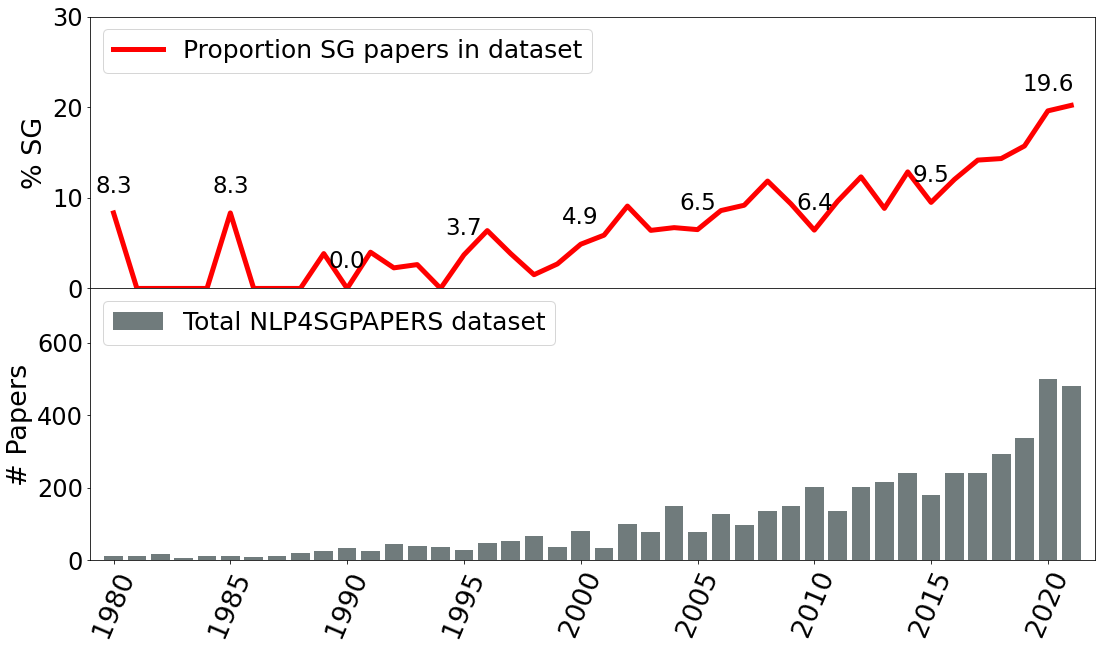

In [23]:
fig, ax = plt.subplots(2, 1,sharex=True,figsize=(18, 10))

ax.flatten()[1].bar(df_plot['year'],df_plot['Total ACL papers'],label='Total NLP4SGPAPERS dataset',color='#707B7C')
#ax.flatten()[1].bar(df_plot['year'],df_plot['NLP4SG'],label='NLP4SG',color='#13d14c')
ax.flatten()[1].legend(loc="upper left",prop={'size': 25})
ax.flatten()[0].plot(df_plot_prop['year'],df_plot_prop['prop'], color='red',linewidth=5,label='Proportion SG papers in dataset')
ax.flatten()[0].set_ylim([0, 30])
ax.flatten()[1].set_ylim([0, 750])
ax.flatten()[0].set_xlim([1979, 2022])
ax.flatten()[0].legend(loc="upper left",prop={'size': 25})
ax.flatten()[1].set_ylabel('# Papers', fontsize=27)
ax.flatten()[0].set_ylabel('% SG', fontsize=27)
plt.subplots_adjust(wspace=0, hspace=0)
counter=4
for x,y in zip(df_plot_prop['year'],df_plot_prop['prop']):
    counter+=1
    if counter%5==0:
        label = "{:.1f}".format(y)

        ax.flatten()[0].annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,20), # distance from text to points (x,y)
                    fontsize=23,
                     ha='center') # horizontal alignment can be left, right or center

#labels=['1975','1980','1985','1990','1995','2000','2005','2010','2015','2020']
#plt.setp(ax,xticks=[int(t)/2022 for t in labels],xticklabels=labels)
plt.tick_params(axis="x", labelsize=27,rotation=67) 
ax.flatten()[0].tick_params(axis="y", labelsize=24) 
ax.flatten()[1].tick_params(axis="y", labelsize=24)
plt.savefig('dist_papers_double.pdf', dpi=700)
plt.show()

<Figure size 432x288 with 0 Axes>